In [3]:
import pandas as pd
import requests
import glob

In [24]:
# url = 'https://openbeerdb.com/files/beers.zip'
# path = 'C:/Users/WLi/OneDrive - Trivadis AG/Aus- Weiterbildung/StreamProcessing_Python_Kafka_PariPhilip'

# file = requests.get(url)

# open(path, 'wb').write(file.content)

# extract_path = 'C:/Users/WLi/OneDrive - Trivadis AG/Aus- Weiterbildung/StreamProcessing_Python_Kafka_PariPhilip'
# #data = pd.read_csv(file)

In [4]:
#data = pd.read_csv("..\openbeerdb_csv\beers.csv")
data = pd.read_csv("beers.csv", header=0, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8])
data

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,brewery_id,name,cat_id,style_id,abv,ibu,srm,upc
0,1,812,Hocus Pocus,11,116,4.5,0,0,0
1,2,264,Grimbergen Blonde,-1,-1,6.7,0,0,0
2,3,779,Widdershins Barleywine,-1,-1,9.1,0,0,0
3,4,287,Lucifer,-1,-1,8.5,0,0,0
4,5,1056,Bitter,-1,-1,4,0,0,0
...,...,...,...,...,...,...,...,...,...
5856,5910,10,Honey Rye Ale,11,128,0,0,0,0
5857,5911,10,Strawberry,11,121,0,0,0,0
5858,5912,10,Satsuma Wit,11,121,0,0,0,0
5859,5913,1422,Abhi beer,7,89,0,0,0,0


In [6]:
data.describe()

,id,brewery_id,name,cat_id,style_id,abv,ibu,srm,upc
count,5845,5837,5837,5832,5829,5825.0,5822,5822,5822
unique,5845,1650,4982,28,129,266.0,20,15,5
top,5263,1072,Pale Ale,3,-1,0.0,0,0,0
freq,1,47,48,1248,1046,2648.0,4803,4809,4816


ValueError: could not convert string to float: 'The Finches are long gone'

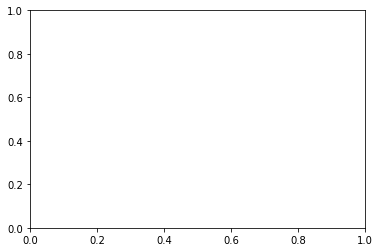

In [13]:

# boxplot = data.boxplot(a)
data.fillna(0)
data.plot(x ='id', y='abv' , kind = 'scatter')

In [41]:
#data = pd.read_csv("..\openbeerdb_csv\beers.csv")
data2 = pd.read_csv("breweries.csv", header=0)
data2.describe()
data2

,id,name,address1,address2,city,state,code,country,phone,website,filepath,descript,last_mod
0,1,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20
1,2,21st Amendment Brewery Cafe,563 Second Street,NaN,San Francisco,California,94107,United States,1-415-369-0900,http://www.21st-amendment.com/,NaN,The 21st Amendment Brewery offers a variety of...,2010-10-24 13:54:07
2,3,3 Fonteinen Brouwerij Ambachtelijke Geuzestekerij,Hoogstraat 2A,NaN,Beersel,Vlaams Brabant,NaN,Belgium,32-02-/-306-71-03,http://www.3fonteinen.be/index.htm,NaN,NaN,2010-07-22 20:00:20
3,4,Aass Brewery,Ole Steensgt. 10 Postboks 1530,NaN,Drammen,NaN,NaN,Norway,47-32-26-60-00,http://www.aass.no,NaN,Aass Brewery was established in 1834 and is th...,2010-07-22 20:00:20
4,5,Abbaye de Leffe,Dinant,NaN,Dinant,Namur,NaN,Belgium,NaN,NaN,NaN,NaN,2010-07-22 20:00:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,1416,Brewery Vivant,925 Cherry Street SE,NaN,Grand Rapids,MI,49506,United States,616 719 1604,http://breweryvivant.com,bv-logo.png,Brewery Vivant is the realization of years of ...,2011-06-22 12:19:30
1410,1417,Oakshire,NaN,NaN,Eugene,Or,NaN,United States,NaN,NaN,NaN,NaN,2011-07-07 07:42:42
1411,1418,Oakshire,NaN,NaN,Eugene,Or,NaN,United States,NaN,NaN,NaN,NaN,2011-07-07 07:44:13
1412,1422,Abhi Brewery,NaN,NaN,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,2011-09-27 00:35:48


In [54]:
data_joined1 = data.merge(data2, left_on=[data['brewery_id'], data2['id']])
data_joined1

TypeError: object of type 'NoneType' has no len()

In [30]:
#data = pd.read_csv("..\openbeerdb_csv\beers.csv")
data3 = pd.read_csv("breweries_geocode.csv", header=0)
print(data3.head())
data3.describe()

,id,brewery_id,latitude,longitude
count,1304.000000,1304.000000,1304.000000,1304.000000
mean,657.648006,699.611196,41.473073,-63.765908
std,379.382053,400.565205,12.959051,58.324611
min,1.000000,1.000000,-45.872000,-157.858000
25%,328.750000,353.500000,38.973475,-105.139500
50%,658.500000,703.500000,42.504450,-83.819250
75%,985.250000,1046.250000,48.149975,-1.260825
max,1315.000000,1394.000000,64.958300,176.854000


In [31]:
#data = pd.read_csv("..\openbeerdb_csv\beers.csv")
data4 = pd.read_csv("categories.csv", header=0)
print(data4.head())
data4.describe()

,id
count,11.000000
mean,6.000000
std,3.316625
min,1.000000
25%,3.500000
50%,6.000000
75%,8.500000
max,11.000000


In [33]:
#data = pd.read_csv("..\openbeerdb_csv\beers.csv")
data5 = pd.read_csv("styles.csv", header=0)
print(data5.head())
data5.describe()

   id  cat_id                      style_name             last_mod
0   1       1  Classic English-Style Pale Ale  2010-10-24 13:53:31
1   2       1    English-Style India Pale Ale  2010-06-15 19:14:38
2   3       1                 Ordinary Bitter  2010-06-15 19:14:54
3   4       1   Special Bitter or Best Bitter  2010-06-15 19:15:02
4   5       1            Extra Special Bitter  2010-06-15 19:15:09


,id,cat_id
count,141.000000,141.000000
mean,71.000000,5.900709
std,40.847277,3.505720
min,1.000000,1.000000
25%,36.000000,3.000000
50%,71.000000,5.000000
75%,106.000000,9.000000
max,141.000000,11.000000


In [27]:
import glob
import os

# get data file names
path = os. getcwd()
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
big_frame = pd.concat(dfs, ignore_index=True)

In [35]:
data.head()

,id,brewery_id,name,cat_id,style_id,abv,ibu,srm,upc,filepath,...,Unnamed: 535,Unnamed: 536,Unnamed: 537,Unnamed: 538,Unnamed: 539,Unnamed: 540,Unnamed: 541,Unnamed: 542,Unnamed: 543,Unnamed: 544
0,1,812,Hocus Pocus,11,116,4.5,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,264,Grimbergen Blonde,-1,-1,6.7,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,779,Widdershins Barleywine,-1,-1,9.1,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,287,Lucifer,-1,-1,8.5,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1056,Bitter,-1,-1,4,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data.describe()

,Unnamed: 40,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 47,Unnamed: 53,Unnamed: 55,Unnamed: 56,Unnamed: 57,...,Unnamed: 531,Unnamed: 533,Unnamed: 535,Unnamed: 537,Unnamed: 538,Unnamed: 539,Unnamed: 540,Unnamed: 541,Unnamed: 542,Unnamed: 543
count,3.000000,3.000000,3.000000,3.000000,2.0,2.0,3.000000,3.000000,3.000000,2.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
mean,459.666667,2.500000,14.333333,2.500000,0.0,0.0,451.833333,0.666667,8.333333,0.0,...,NaN,0.0,618.0,8.0,96.0,0.0,0.0,0.0,0.0,NaN
std,690.892418,2.291288,24.826062,4.330127,0.0,0.0,697.000777,1.154701,14.433757,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.000000,0.000000,0.000000,0.000000,0.0,0.0,5.500000,0.000000,0.000000,0.0,...,NaN,0.0,618.0,8.0,96.0,0.0,0.0,0.0,0.0,NaN
25%,62.000000,1.500000,0.000000,0.000000,0.0,0.0,50.250000,0.000000,0.000000,0.0,...,NaN,0.0,618.0,8.0,96.0,0.0,0.0,0.0,0.0,NaN
50%,116.000000,3.000000,0.000000,0.000000,0.0,0.0,95.000000,0.000000,0.000000,0.0,...,NaN,0.0,618.0,8.0,96.0,0.0,0.0,0.0,0.0,NaN
75%,685.500000,3.750000,21.500000,3.750000,0.0,0.0,675.000000,1.000000,12.500000,0.0,...,NaN,0.0,618.0,8.0,96.0,0.0,0.0,0.0,0.0,NaN
max,1255.000000,4.500000,43.000000,7.500000,0.0,0.0,1255.000000,2.000000,25.000000,0.0,...,NaN,0.0,618.0,8.0,96.0,0.0,0.0,0.0,0.0,NaN


In [32]:
big_frame.head()
big_frame.describe()

,Unnamed: 40,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 47,Unnamed: 53,Unnamed: 55,Unnamed: 56,Unnamed: 57,...,Unnamed: 535,Unnamed: 537,Unnamed: 538,Unnamed: 539,Unnamed: 540,Unnamed: 541,Unnamed: 542,Unnamed: 543,latitude,longitude
count,3.000000,3.000000,3.000000,3.000000,2.0,2.0,3.000000,3.000000,3.000000,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1304.000000,1304.000000
mean,459.666667,2.500000,14.333333,2.500000,0.0,0.0,451.833333,0.666667,8.333333,0.0,...,618.0,8.0,96.0,0.0,0.0,0.0,0.0,NaN,41.473073,-63.765908
std,690.892418,2.291288,24.826062,4.330127,0.0,0.0,697.000777,1.154701,14.433757,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.959051,58.324611
min,8.000000,0.000000,0.000000,0.000000,0.0,0.0,5.500000,0.000000,0.000000,0.0,...,618.0,8.0,96.0,0.0,0.0,0.0,0.0,NaN,-45.872000,-157.858000
25%,62.000000,1.500000,0.000000,0.000000,0.0,0.0,50.250000,0.000000,0.000000,0.0,...,618.0,8.0,96.0,0.0,0.0,0.0,0.0,NaN,38.973475,-105.139500
50%,116.000000,3.000000,0.000000,0.000000,0.0,0.0,95.000000,0.000000,0.000000,0.0,...,618.0,8.0,96.0,0.0,0.0,0.0,0.0,NaN,42.504450,-83.819250
75%,685.500000,3.750000,21.500000,3.750000,0.0,0.0,675.000000,1.000000,12.500000,0.0,...,618.0,8.0,96.0,0.0,0.0,0.0,0.0,NaN,48.149975,-1.260825
max,1255.000000,4.500000,43.000000,7.500000,0.0,0.0,1255.000000,2.000000,25.000000,0.0,...,618.0,8.0,96.0,0.0,0.0,0.0,0.0,NaN,64.958300,176.854000
